# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.13


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
d0 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
d0

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


In [15]:
d1 = d0.groupby('Cidade')['Valor_Venda'].sum().reset_index()
d1.sort_values(by='Valor_Venda',ascending=False)

,Cidade,Valor_Venda
295,New York City,68362.814
239,Los Angeles,47098.100
392,San Francisco,41771.198
406,Seattle,34856.878
335,Philadelphia,29313.687
...,...,...
316,Ormond Beach,2.808
331,Pensacola,2.214
202,Jupiter,2.064
129,Elyria,1.824


In [16]:
d1_max_ValorVenda = d1.loc[d1['Valor_Venda'].idxmax()]
print(d1_max_ValorVenda,'\n')
a = d1_max_ValorVenda['Cidade']
b = d1_max_ValorVenda['Valor_Venda']
print(f'O maior valor de venda, na categoria Office Supplies, ocorreu na cidade de {a} com o respectivo valor de U$ {b}.')

Cidade         New York City
Valor_Venda        68362.814
Name: 295, dtype: object 

O maior valor de venda, na categoria Office Supplies, ocorreu na cidade de New York City com o respectivo valor de U$ 68362.814.


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [17]:
d2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
d2.reset_index()

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744
...,...,...
1221,31/10/2017,2346.5790
1222,31/10/2018,523.9280
1223,31/12/2015,5253.2700
1224,31/12/2016,1381.3440


In [18]:
d2_descrescente = d2.sort_values(ascending=False)
da = d2_descrescente.reset_index()
da

,Data_Pedido,Valor_Venda
0,18/03/2015,28106.716
1,02/10/2017,18452.972
2,22/10/2018,15158.877
3,23/03/2018,14816.068
4,08/09/2015,14228.428
...,...,...
1221,01/10/2015,4.710
1222,24/06/2015,4.272
1223,28/01/2015,3.928
1224,12/07/2018,3.816


In [19]:
e = da['Data_Pedido'].str.split('/').reset_index()
ano = []
for celula in e['Data_Pedido']:
    z = celula[2]
    ano.append(z)
da['Ano'] = ano
da

,Data_Pedido,Valor_Venda,Ano
0,18/03/2015,28106.716,2015
1,02/10/2017,18452.972,2017
2,22/10/2018,15158.877,2018
3,23/03/2018,14816.068,2018
4,08/09/2015,14228.428,2015
...,...,...,...
1221,01/10/2015,4.710,2015
1222,24/06/2015,4.272,2015
1223,28/01/2015,3.928,2015
1224,12/07/2018,3.816,2018


In [20]:
s = da[['Ano','Valor_Venda']].groupby('Ano')['Valor_Venda'].sum().reset_index()
s


,Ano,Valor_Venda
0,2015,470768.6001
1,2016,454072.5154
2,2017,595365.9240
3,2018,715350.9152


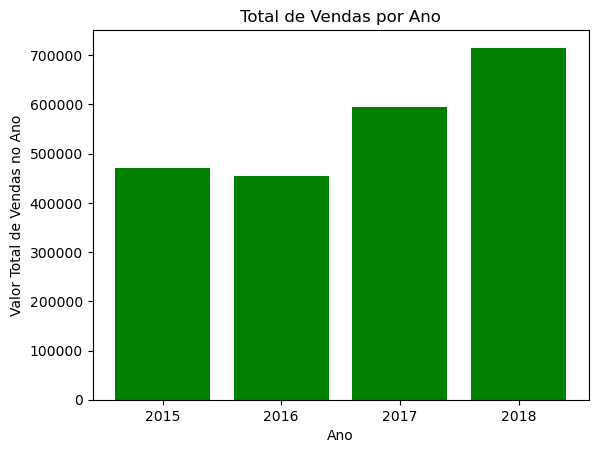

In [21]:
Ano1 = s['Ano']
Valor_Venda1 = s['Valor_Venda']
plt.bar(Ano1,Valor_Venda1,color = 'green')
plt.ylabel('Valor Total de Vendas no Ano')
plt.xlabel('Ano')
plt.title('Total de Vendas por Ano')
plt.show()

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [22]:
d2_1 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
d2_1_indexreset = d2_1.reset_index()
d2_1_indexreset

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744
...,...,...
1221,31/10/2017,2346.5790
1222,31/10/2018,523.9280
1223,31/12/2015,5253.2700
1224,31/12/2016,1381.3440


In [23]:
d2_1 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
d2_1_indexreset = d2_1.reset_index()
data_invertida = []
data_primeira = []
for i in d2_1_indexreset['Data_Pedido'].str.split('/'):
    str(data_primeira.append(i[2]))
    str(data_primeira.append(i[1]))
    str(data_primeira.append(i[0]))
    data_invertida.append(data_primeira)
    data_primeira = []
data_com_barra = []
for i in data_invertida:
    p = i[0] + '/' + i[1] + '/' + i[2]
    data_com_barra.append(p)
d2_1_indexreset['Data_Invertida'] = data_com_barra
d2_organizadas = d2_1_indexreset[['Data_Invertida','Valor_Venda']].sort_values(by='Data_Invertida')
print(d2_organizadas)
print(d2_organizadas.loc[d2_organizadas.idxmax()])

     Data_Invertida  Valor_Venda
78       2015/01/03      16.4480
119      2015/01/04     288.0600
159      2015/01/05      19.5360
199      2015/01/06    4407.1000
239      2015/01/07      87.1580
...             ...          ...
1047     2018/12/26     814.5940
1085     2018/12/27     177.6360
1127     2018/12/28    1657.3508
1162     2018/12/29    2915.5340
1201     2018/12/30     713.7900

[1226 rows x 2 columns]
     Data_Invertida  Valor_Venda
1201     2018/12/30      713.790
689      2015/03/18    28106.716


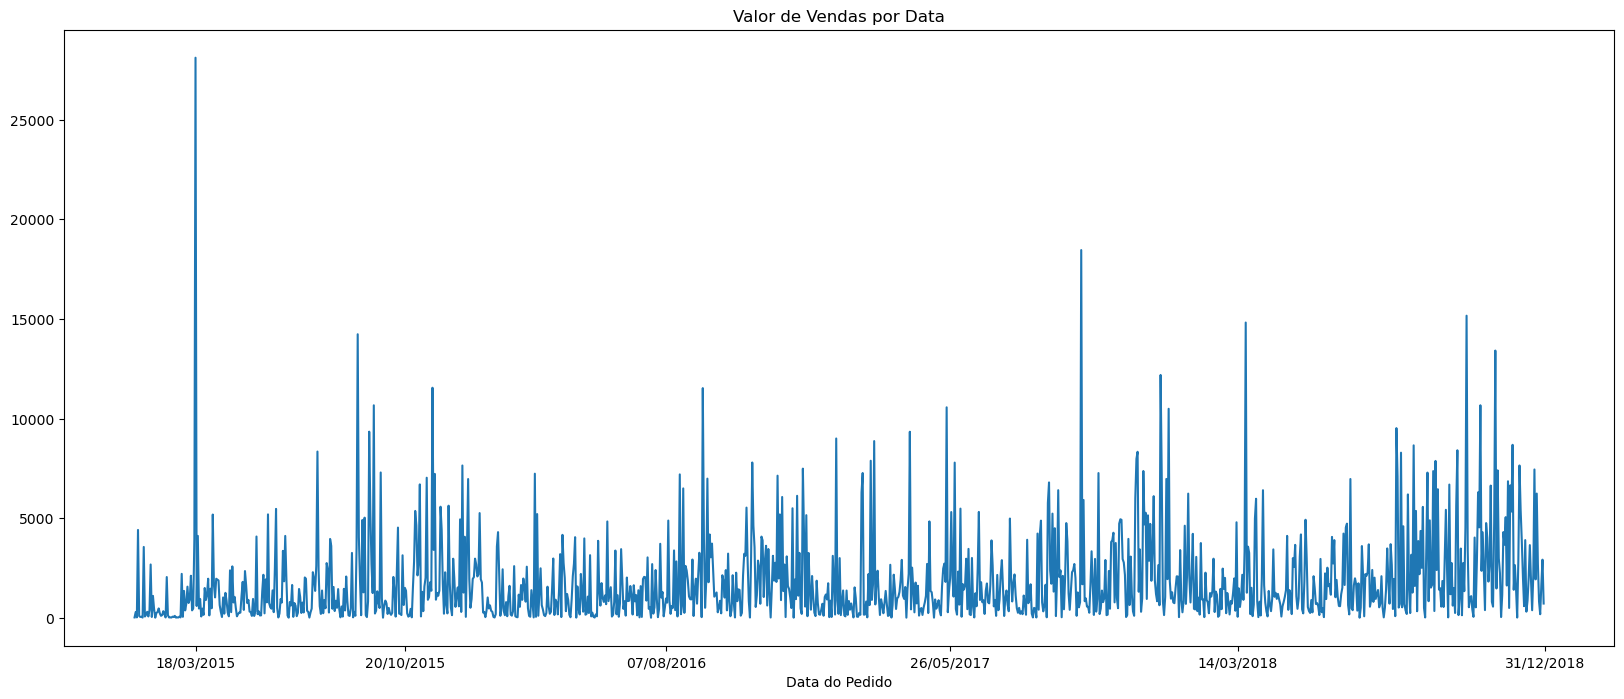

In [24]:
x = d2_organizadas['Data_Invertida']
y = d2_organizadas['Valor_Venda']
fig, axe = plt.subplots(figsize=(20,8))
axe.plot(x,y)
plt.setp(axe, xticks=['2015/03/18','2015/10/20','2016/08/07','2017/05/26','2018/03/14','2018/12/31'], xticklabels=['18/03/2015','20/10/2015','07/08/2016','26/05/2017','14/03/2018','31/12/2018'])
plt.xlabel('Data do Pedido')
plt.title('Valor de Vendas por Data')
plt.show()

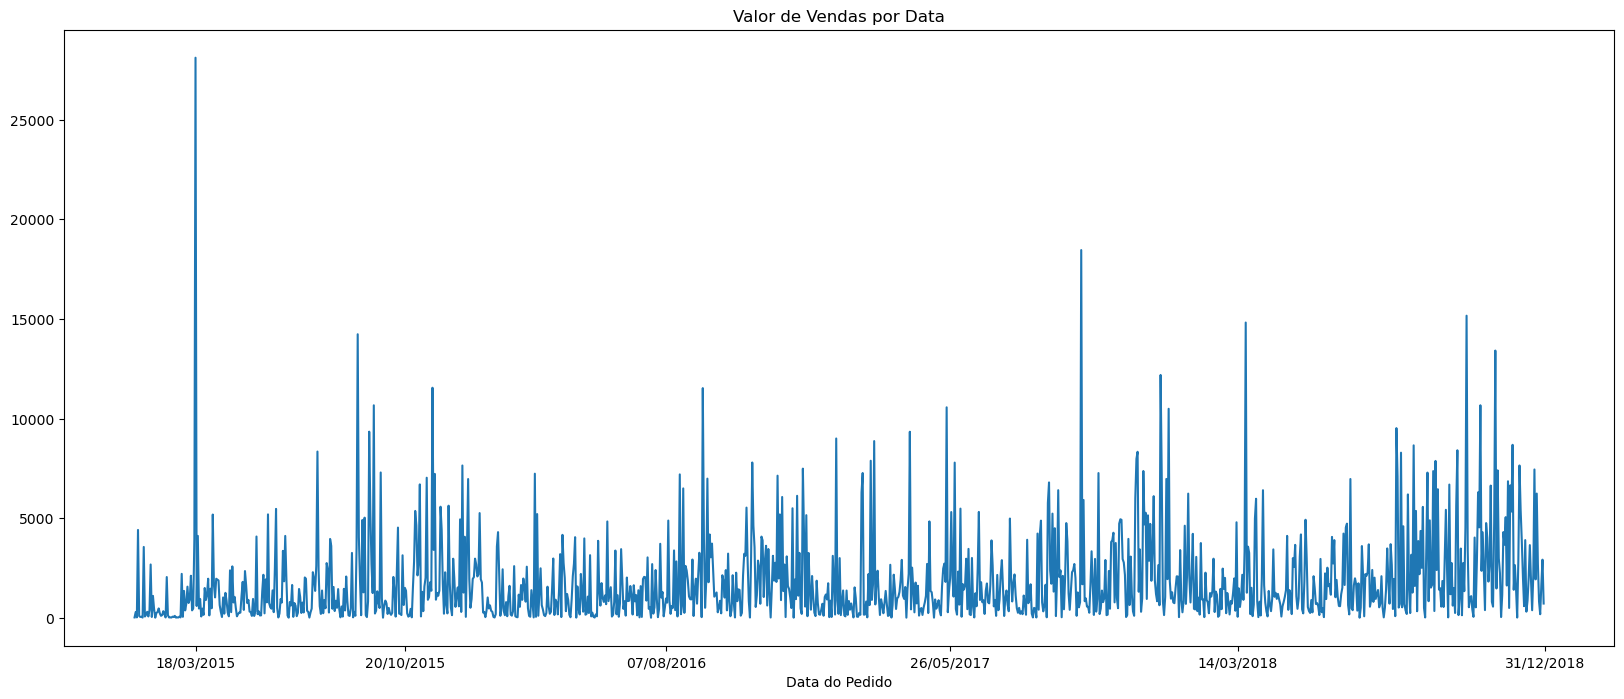

In [25]:
plt.figure(figsize=(20,8))
plt.plot(d2_organizadas['Data_Invertida'],d2_organizadas['Valor_Venda'])
plt.xticks(['2015/03/18','2015/10/20','2016/08/07','2017/05/26','2018/03/14','2018/12/31'],['18/03/2015','20/10/2015','07/08/2016','26/05/2017','14/03/2018','31/12/2018'])
plt.xlabel('Data do Pedido')
plt.title('Valor de Vendas por Data')
plt.show()


In [26]:
data_da_maior_venda = d2_1.idxmax()
valor_maior_venda = d2_1.max()
print(f'A data que ocorreu o maior valor total de vendas foi {data_da_maior_venda} e o valor foi de {valor_maior_venda}.')

A data que ocorreu o maior valor total de vendas foi 18/03/2015 e o valor foi de 28106.716.


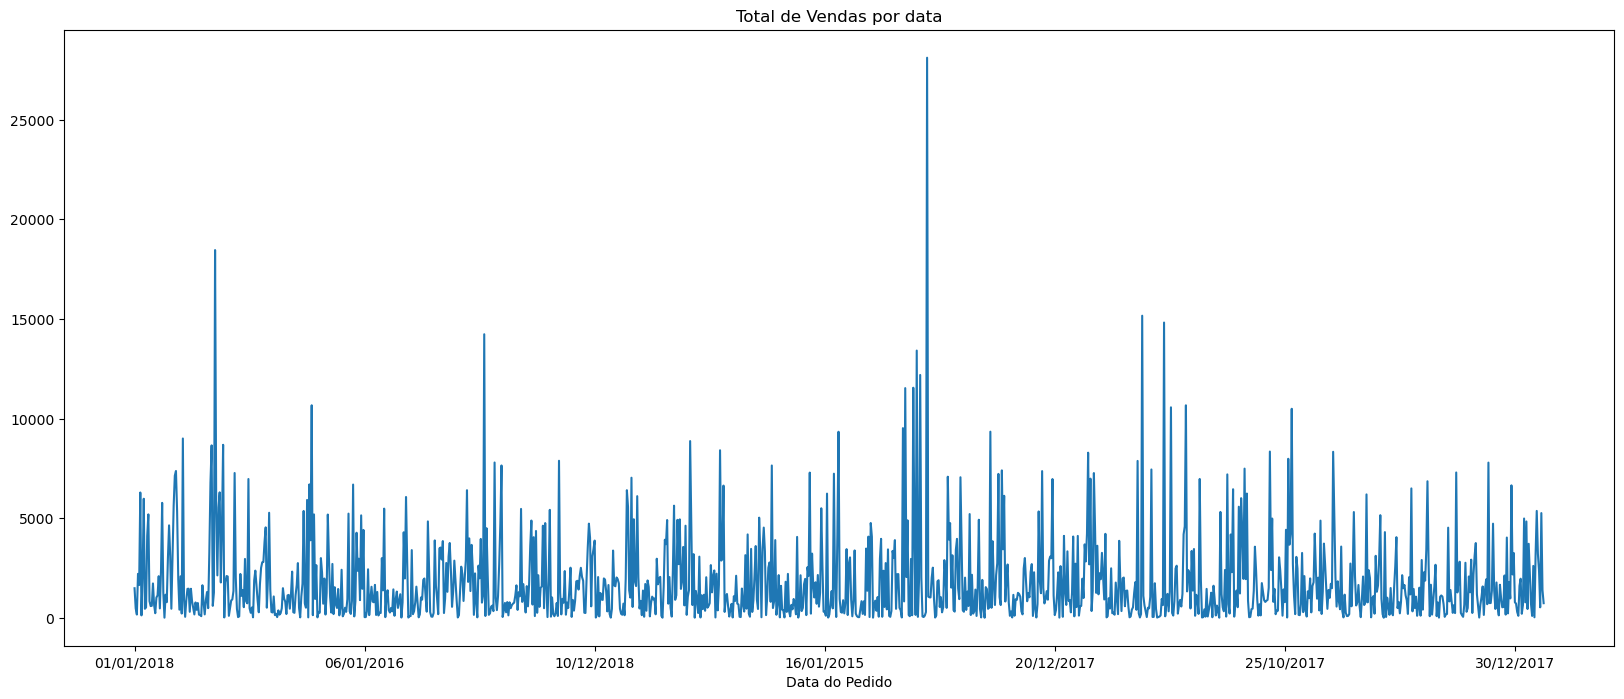

In [27]:
plt.figure(figsize=(20,8))
d2_1.plot()
plt.title('Total de Vendas por data')
plt.xlabel('Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [28]:
d3 = df_dsa.groupby('Estado')['Valor_Venda'].sum()
d3.reset_index().sort_values(by='Valor_Venda')

,Estado,Valor_Venda
32,North Dakota,919.9100
46,West Virginia,1209.8240
17,Maine,1270.5300
39,South Dakota,1315.5600
48,Wyoming,1603.1360
7,District of Columbia,2865.0200
14,Kansas,2914.3100
10,Idaho,4292.5160
13,Iowa,4443.5600
43,Vermont,4524.4700


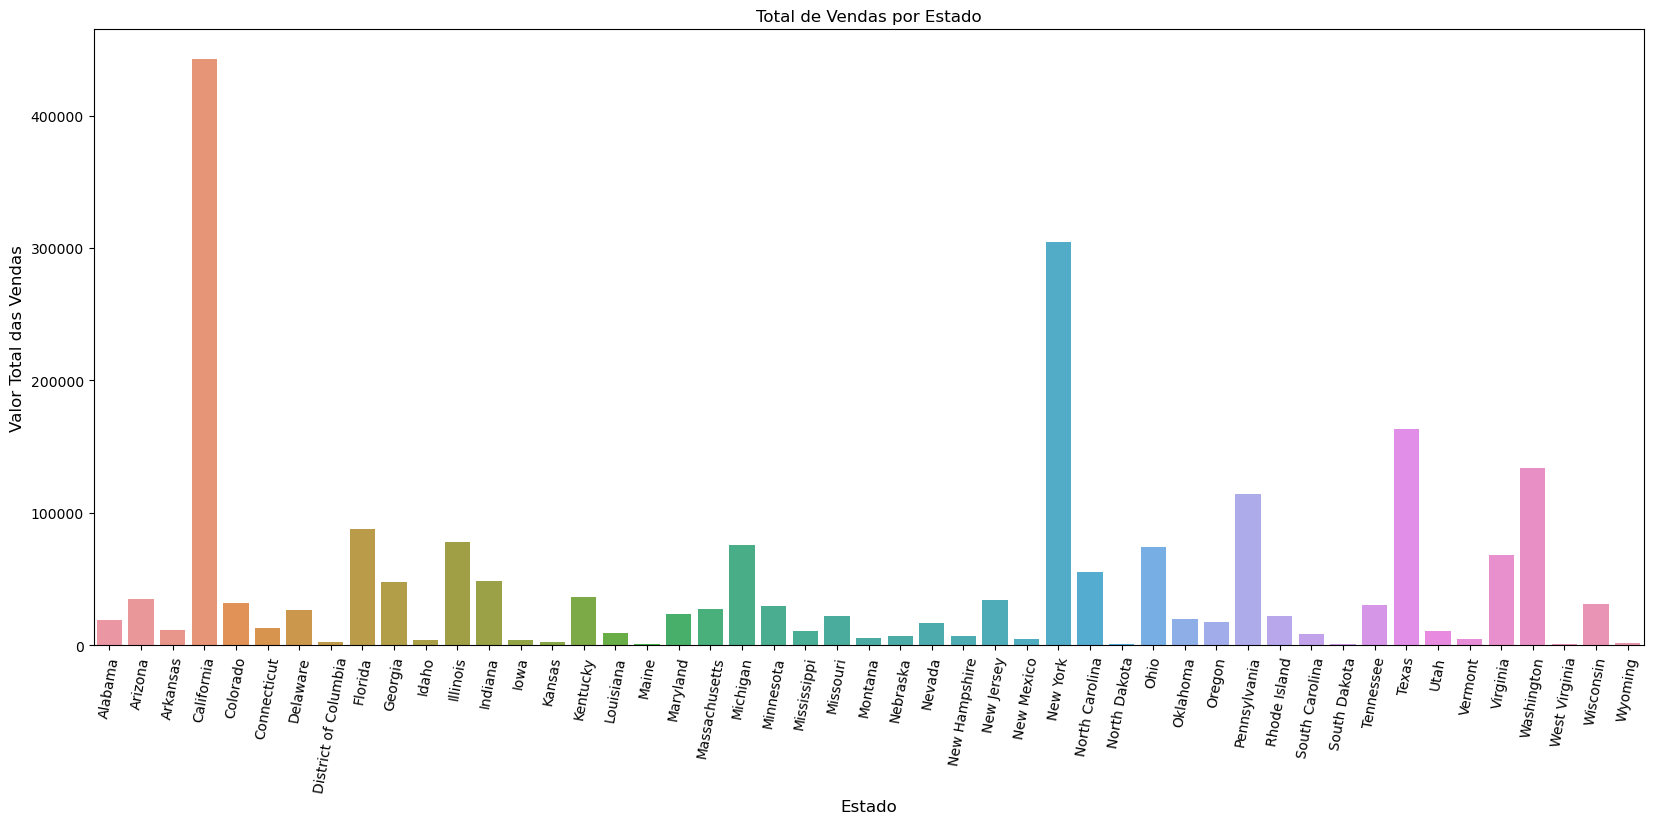

In [29]:
fig, axe = plt.subplots(figsize=(20,8))
sns.barplot(data = d3.reset_index(),
            y = 'Valor_Venda',
            x = 'Estado')
axe.set_xlabel('Estado',size = 12)
axe.set_ylabel('Valor Total das Vendas',size = 12)
axe.set_title('Total de Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [30]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [31]:
d4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda').tail(10)
d4

,Cidade,Valor_Venda
123,Detroit,42446.9440
216,Jacksonville,44713.1830
80,Chicago,46974.3430
435,San Diego,47458.3790
207,Houston,61590.1868
372,Philadelphia,107197.8030
436,San Francisco,107489.9520
450,Seattle,114725.4780
265,Los Angeles,171654.6330
327,New York City,251749.2190


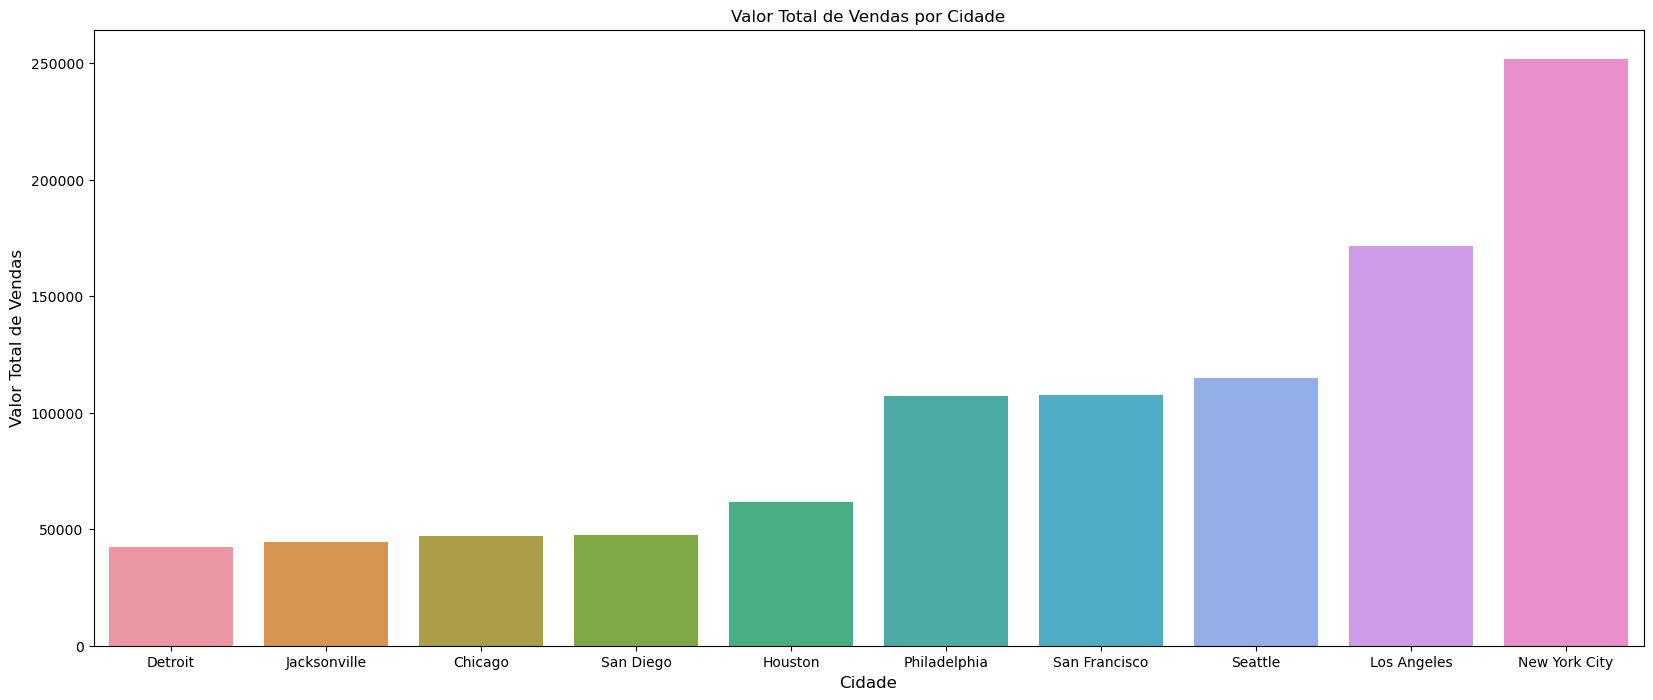

In [68]:
fig, ax = plt.subplots(figsize = ( 20 , 8 )) 
sns.barplot( ax = ax , x = "Cidade" ,
             y = "Valor_Venda" ,
               data = d4) 
sns.set_palette('coolwarm') #cores quentes
ax.set_xlabel( "Cidade" , size = 12 ) 
ax.set_ylabel( "Valor Total de Vendas" , size = 12 ) 
ax.set_title( "Valor Total de Vendas por Cidade" , size = 12 )
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [33]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [34]:
d5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()
d5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [35]:
d5_max = d5.loc[d5['Valor_Venda'].idxmax()]
d5_max

Segmento          Consumer
Valor_Venda    1133834.335
Name: 0, dtype: object

In [36]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

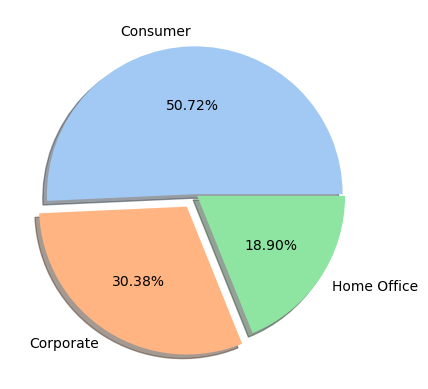

In [37]:
colors5 = sns.color_palette('pastel')[0:5]
explode = (0,0.1,0.02)
plt.pie(d5['Valor_Venda'],
        explode=explode,
        labels = d5['Segmento'],
        colors = colors5,
        autopct='%.2f%%',
        shadow = True)
plt.show()

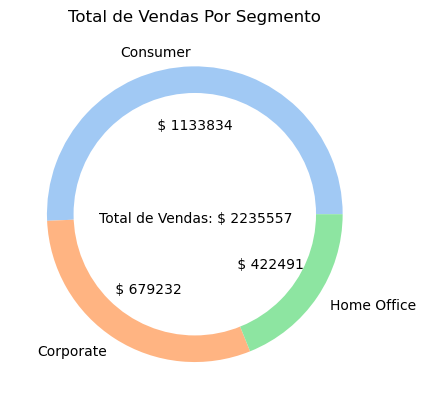

In [38]:
plt.pie(d5['Valor_Venda'],
        labels = d5['Segmento'],
        autopct = autopct_format(d5['Valor_Venda']),
        colors = colors5)
# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(d5['Valor_Venda']))), xy = (-0.65, -0.05))
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [39]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [40]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [41]:
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [42]:
d6 = df_dsa.sort_values('Data_Pedido')
d6['Ano'] = d6['Data_Pedido'].dt.year
d6

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
7977,CA-2015-103800,2015-01-03,DP-13000,Consumer,United States,Houston,Texas,OFF-PA-10000174,Office Supplies,Paper,16.448,2015
739,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-LA-10003223,Office Supplies,Labels,11.784,2015
740,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-ST-10002743,Office Supplies,Storage,272.736,2015
741,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-BI-10004094,Office Supplies,Binders,3.540,2015
1759,CA-2015-141817,2015-01-05,MB-18085,Consumer,United States,Philadelphia,Pennsylvania,OFF-AR-10003478,Office Supplies,Art,19.536,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
908,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,OFF-BI-10003684,Office Supplies,Binders,52.776,2018
906,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,FUR-BO-10003441,Furniture,Bookcases,323.136,2018
907,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,TEC-PH-10004774,Technology,Phones,90.930,2018
1297,CA-2018-115427,2018-12-30,EB-13975,Corporate,United States,Fairfield,California,OFF-BI-10004632,Office Supplies,Binders,20.720,2018


In [82]:
d6_ano_series = d6.groupby(['Ano','Segmento'])['Valor_Venda'].sum()#.reset_index().sort_values(by='Ano')
print(d6_ano_series)
d6_ano_df = d6_ano_series.reset_index()
print('\n', d6_ano_df)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

      Ano     Segmento  Valor_Venda
0   2015     Consumer  256719.9166
1   2015    Corporate  125819.5957
2   2015  Home Office   88229.0878
3   2016     Consumer  265295.2593
4   2016    Corporate  114643.1229
5   2016  Home Office   74134.1332
6   2017     Consumer  288459.5572
7   2017    Corporate  203266.7398
8   2017  Home Office  103639.6270
9   2018     Consumer  323359.6019
10  2018    Corporate  235502.7284
11  2018  Home Office  156488.5849


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [44]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [45]:
d7 = df_dsa.query('Valor_Venda > 1000')

In [46]:
print(d7[d7.columns[0]].count(),'vendas receberiam o desconto de 15%.')

457 vendas receberiam o desconto de 15%.


In [47]:
d7_1 = df_dsa.query('Valor_Venda < 1000')
d7_1

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [48]:
print(d7_1[d7_1.columns[0]].count(),'vendas receberiam o desconto de 10%.')

9243 vendas receberiam o desconto de 10%.


In [49]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.1)
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1


In [50]:
d7_3 = df_dsa['Desconto'].value_counts().reset_index()
d7_3

,Desconto,count
0,0.10,9243
1,0.15,457


In [51]:
print('A quantidade de vendas que receberiam o desconto de 10% é de 9243 e de 15% é de 457.')

A quantidade de vendas que receberiam o desconto de 10% é de 9243 e de 15% é de 457.


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [52]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1


In [53]:
df_dsa['Valor_Venda_com_Desconto'] = np.where(df_dsa['Desconto'] == 0.1, df_dsa['Valor_Venda']*0.9, df_dsa['Valor_Venda']*0.85)
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_com_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,20.54700
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,48.88800
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,177.09840
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,3.25800


In [54]:
d8_valor_antes_desconto_10 = df_dsa.loc[df_dsa['Desconto'] == 0.1, 'Valor_Venda']
d8_valor_depois_desconto_10 = df_dsa.loc[df_dsa['Desconto'] == 0.1, 'Valor_Venda_com_Desconto']
d8_valor_antes_desconto_15 = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']
d8_valor_depois_desconto_15 = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_com_Desconto']

In [83]:
media_antes_desconto10 = round(d8_valor_antes_desconto_10.mean(),2)
media_depois_desconto10 = round(d8_valor_depois_desconto_10.mean(),2)
media_antes_desconto15 = round(d8_valor_antes_desconto_15.mean(),2)
media_depois_desconto15 = round(d8_valor_depois_desconto_15.mean(),2)
print(f'O valor da média antes do desconto de 10% {media_antes_desconto10} e depois do desconto de 10% {media_depois_desconto10}.')
print(f'O valor da média antes do desconto de 15% {media_antes_desconto15} e depois do desconto de 15% {media_depois_desconto15}.')

O valor da média antes do desconto de 10% 137.2 e depois do desconto de 10% 123.48.
O valor da média antes do desconto de 15% 2116.81 e depois do desconto de 15% 1799.29.


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [56]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_com_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,20.54700
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,48.88800
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,177.09840
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,3.25800


In [57]:
df_dsa['Mês'] = df_dsa['Data_Pedido'].dt.month
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_com_Desconto,Mês,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400,11,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600,11,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800,6,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975,10,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,20.54700,12,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,48.88800,12,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,177.09840,12,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,3.25800,10,2017


In [58]:
d9 = df_dsa.groupby(['Ano','Mês','Segmento'])['Valor_Venda'].agg([np.sum,np.mean,np.median])
d9

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_4832\1998764431.py:1: FutureWarning: The provided callable <function sum at 0x000001F13FDA45E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d9 = df_dsa.groupby(['Ano','Mês','Segmento'])['Valor_Venda'].agg([np.sum,np.mean,np.median])
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_4832\1998764431.py:1: FutureWarning: The provided callable <function mean at 0x000001F13FDA5510> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d9 = df_dsa.groupby(['Ano','Mês','Segmento'])['Valor_Venda'].agg([np.sum,np.mean,np.median])
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_4832\1998764431.py:1: FutureWarning: The provided callable <function median at 0x000001F13FEB30A0> is currently using SeriesGroupBy.media

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [59]:
anos = d9.index.get_level_values(0)
meses = d9.index.get_level_values(1)
segmentos = d9.index.get_level_values(2)

c:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with 

<Figure size 1200x600 with 0 Axes>

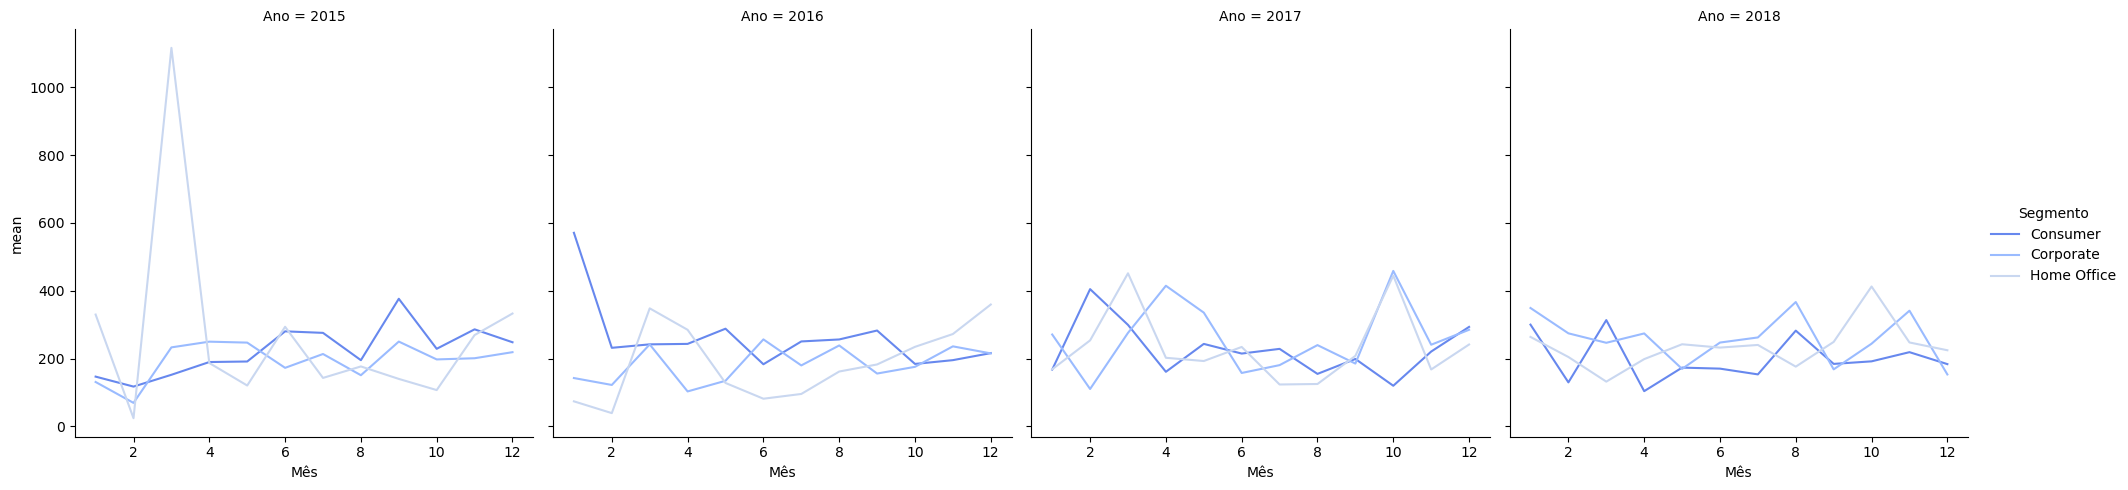

In [87]:
plt.figure(figsize=(12,6))
sns.set #resetar a paleta de cores
figura1 = sns.relplot(kind='line',
                    data=d9,
                    y = 'mean',
                    x = meses,
                    hue = segmentos,
                    col = anos,
                    col_wrap = 4)
#relplot realiza um gráfico com vários plots
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [61]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_com_Desconto,Mês,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400,11,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600,11,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800,6,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975,10,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,20.54700,12,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,48.88800,12,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,177.09840,12,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,3.25800,10,2017


In [62]:
d10 = df_dsa.groupby(['Categoria','SubCategoria'])['Valor_Venda'].sum().astype(int).sort_values(ascending=False).reset_index().head(12) #ou pode usar .sum(numeric_only = True) para realizar a soma apenas para os numéricos
d10

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271
1,Furniture,Chairs,317919
2,Office Supplies,Storage,216188
3,Furniture,Tables,202083
4,Office Supplies,Binders,194723
5,Technology,Machines,189238
6,Technology,Accessories,162791
7,Technology,Copiers,146248
8,Furniture,Bookcases,108045
9,Office Supplies,Appliances,104061


In [63]:
d10 = d10.sort_values(by='Categoria')
d10

,Categoria,SubCategoria,Valor_Venda
1,Furniture,Chairs,317919
3,Furniture,Tables,202083
8,Furniture,Bookcases,108045
10,Furniture,Furnishings,88862
2,Office Supplies,Storage,216188
4,Office Supplies,Binders,194723
9,Office Supplies,Appliances,104061
11,Office Supplies,Paper,76312
0,Technology,Phones,325271
5,Technology,Machines,189238


In [64]:
d10_cat = d10.groupby(['Categoria'])['Valor_Venda'].sum().reset_index()
d10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [65]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27'] #definir códigos pelo google, com hexadecimal
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

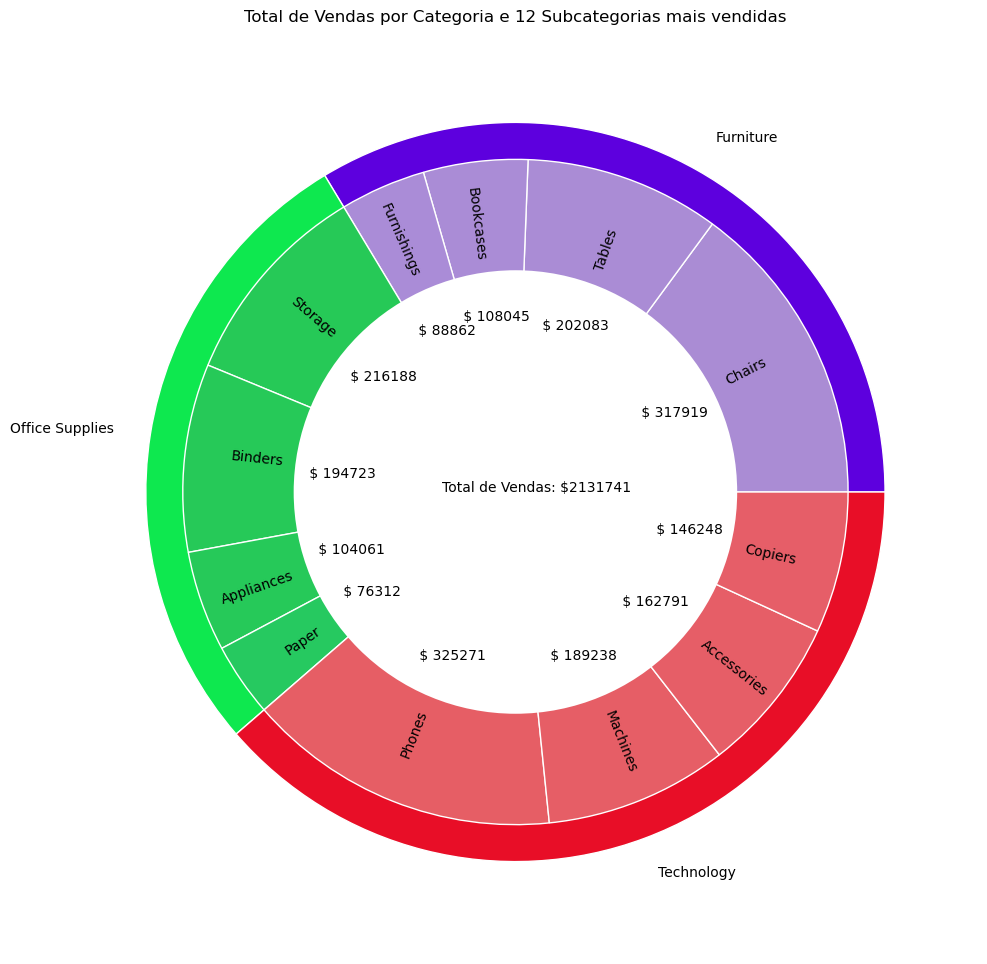

In [91]:
fig, ax = plt.subplots(figsize = (18,12))
p1 = ax.pie(d10_cat['Valor_Venda'],
            radius = 1,
            labels = d10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

p2 = ax.pie(d10['Valor_Venda'],
            radius = 0.9,
            labels = d10['SubCategoria'],
            autopct = autopct_format(d10['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

centre_circle = plt.Circle((0,0), 0.6, fc = 'white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$' + str(int(sum(d10['Valor_Venda']))), xy = (-0.2,0))
plt.title('Total de Vendas por Categoria e 12 Subcategorias mais vendidas')
plt.show()

# Fim